In [3]:
import pandas as pd
import numpy as np

df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

df_test = pd.read_excel('Test_set.xlsx')

In [4]:
df_train.shape

(10683, 11)

In [5]:
df = df_train.copy()

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(how='any',axis=0,inplace=True)

In [9]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df1 = df.copy()
df1['Departure'] = df1['Date_of_Journey'].apply(str) + ' ' + df1['Dep_Time'].apply(str)
df1['Departure'] = pd.to_datetime(df1.Departure)
df1.Duration.head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [12]:
def duration_mins(dur):
    if len(dur)==2:
        mins = int(dur[0][:-1])*60 + int(dur[1][:-1])
    if len(dur)==1:
        mins = int(dur[0][:-1])*60
    return mins

In [13]:
df1['Duration'] = (((df1['Duration'].apply(lambda x: ((str(x)).strip()).split(' '))))).apply(duration_mins)
df1.drop(['Date_of_Journey','Dep_Time','Route'],axis=1,inplace=True)
df1.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,170,non-stop,No info,3897,2019-03-24 22:20:00
1,Air India,Kolkata,Banglore,13:15,445,2 stops,No info,7662,2019-01-05 05:50:00
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,1140,2 stops,No info,13882,2019-09-06 09:25:00
3,IndiGo,Kolkata,Banglore,23:30,325,1 stop,No info,6218,2019-12-05 18:05:00
4,IndiGo,Banglore,New Delhi,21:35,285,1 stop,No info,13302,2019-01-03 16:50:00


In [14]:
df1.replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4}, inplace=True)
df1['Total_Stops'] = df1.Total_Stops.apply(int)
df1.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Departure
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,170,0,No info,3897,2019-03-24 22:20:00
1,Air India,Kolkata,Banglore,13:15,445,2,No info,7662,2019-01-05 05:50:00
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,1140,2,No info,13882,2019-09-06 09:25:00
3,IndiGo,Kolkata,Banglore,23:30,325,1,No info,6218,2019-12-05 18:05:00
4,IndiGo,Banglore,New Delhi,21:35,285,1,No info,13302,2019-01-03 16:50:00


In [15]:
df1['Journey_day'] = df1.Departure.dt.day
df1['Journey_month'] = df1.Departure.dt.month
df1['Departure_hr'] = df1.Departure.dt.hour
df1['Departure_min'] = df1.Departure.dt.minute
df1['Arrival_hr'] = pd.to_datetime(df1.Arrival_Time).dt.hour
df1['Arrival_min'] = pd.to_datetime(df1.Arrival_Time).dt.minute

In [16]:
df1.drop(['Arrival_Time','Departure'],axis=1,inplace=True)
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hr,Departure_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,3,1,16,50,21,35


<AxesSubplot:title={'center':'Airline v Price'}, xlabel='Airline', ylabel='Price'>

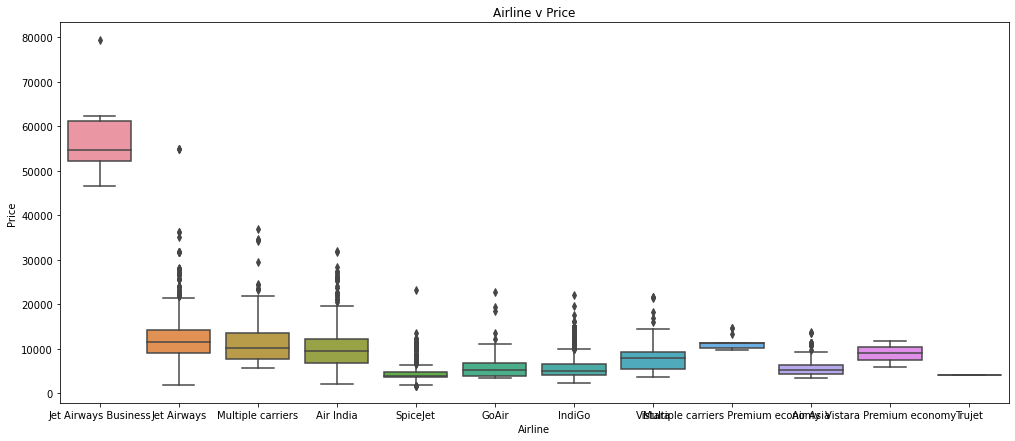

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(17,7))
plt.title('Airline v Price')
sns.boxplot(x='Airline', y='Price', data=df1.sort_values('Price',ascending=False))

<AxesSubplot:title={'center':'Source v Price'}, xlabel='Source', ylabel='Price'>

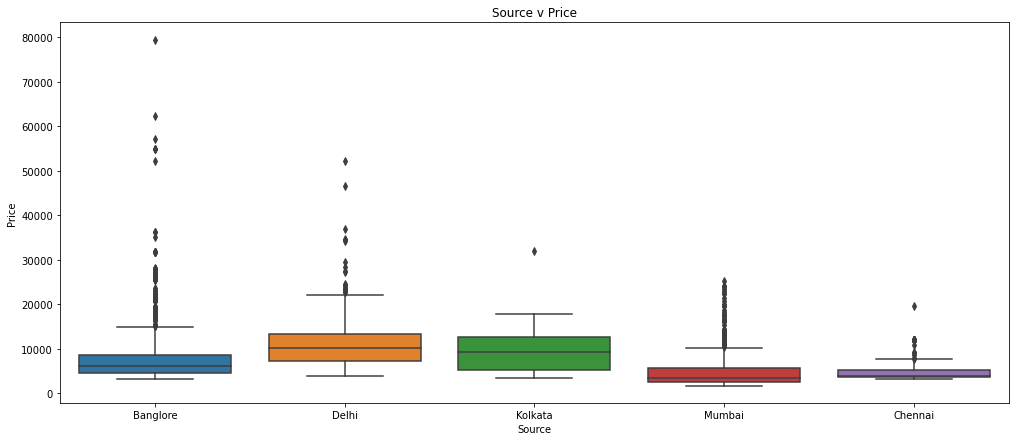

In [18]:
plt.figure(figsize=(17,7))
plt.title('Source v Price')
sns.boxplot(x='Source', y='Price', data=df1.sort_values('Price',ascending=False))

<AxesSubplot:title={'center':'Destination v Price'}, xlabel='Destination', ylabel='Price'>

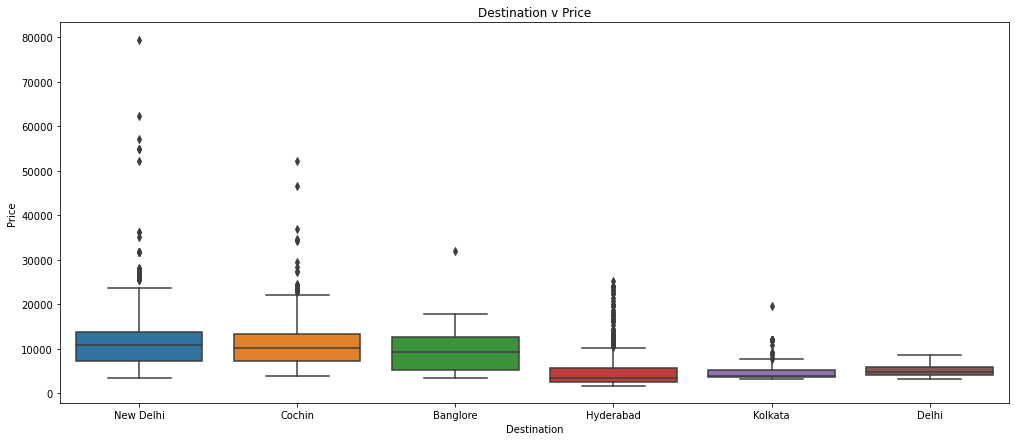

In [19]:
plt.figure(figsize=(17,7))
plt.title('Destination v Price')
sns.boxplot(x='Destination', y='Price', data=df1.sort_values('Price',ascending=False))

<AxesSubplot:title={'center':'Total Stops v Price'}, xlabel='Total_Stops', ylabel='Price'>

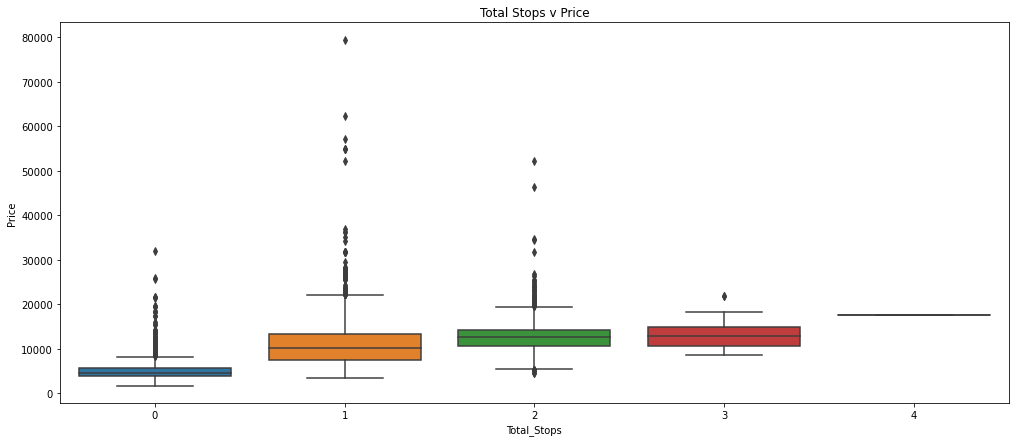

In [20]:
plt.figure(figsize=(17,7))
plt.title('Total Stops v Price')
sns.boxplot(x='Total_Stops', y='Price', data=df1.sort_values('Price',ascending=False))

<AxesSubplot:title={'center':'Info v Price'}, xlabel='Additional_Info', ylabel='Price'>

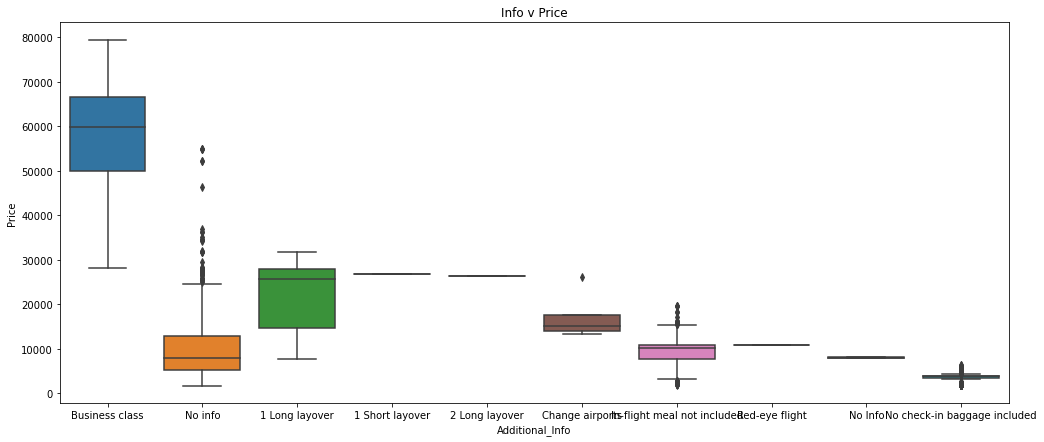

In [21]:
plt.figure(figsize=(17,7))
plt.title('Info v Price')
sns.boxplot(x='Additional_Info', y='Price', data=df1.sort_values('Price',ascending=False))

In [22]:
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Departure_hr,Departure_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,3,1,16,50,21,35


In [23]:
df1.drop('Additional_Info',axis=1,inplace=True)

In [24]:
df1.shape

(10682, 12)

In [25]:
df1 = df1[~(df1.Airline=='Trujet')]
df1.shape

(10681, 12)

In [26]:
df2 = df1.copy()
dummies = pd.get_dummies(df2, columns=['Airline','Source','Destination'], drop_first=True)
pd.set_option('display.max_columns', 100)
dummies

,Duration,Total_Stops,Price,Journey_day,Journey_month,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,5,1,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,6,9,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,5,12,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,3,1,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,4,9,19,55,22,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,155,0,4145,27,4,20,45,23,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,180,0,7229,27,4,8,20,11,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,160,0,12648,3,1,11,30,14,10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [27]:
train_data = dummies

In [28]:
df3 = pd.read_excel('Test_set.xlsx')
df3.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [29]:
df3.dropna(how='any',axis=0,inplace=True)

df4 = df3.copy()
df4['Departure'] = df4['Date_of_Journey'].apply(str) + ' ' + df4['Dep_Time'].apply(str)
df4['Departure'] = pd.to_datetime(df4.Departure)
df1.Duration.head()

def duration_mins(dur):
    if len(dur)==2:
        mins = int(dur[0][:-1])*60 + int(dur[1][:-1])
    if len(dur)==1:
        mins = int(dur[0][:-1])*60
    return mins

df4['Duration'] = (((df4['Duration'].apply(lambda x: ((str(x)).strip()).split(' '))))).apply(duration_mins)
df4.drop(['Date_of_Journey','Dep_Time','Route'],axis=1,inplace=True)

df4.replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4}, inplace=True)

df4['Total_Stops'] = df4.Total_Stops.apply(int)
df4['Journey_day'] = df4.Departure.dt.day
df4['Journey_month'] = df4.Departure.dt.month
df4['Departure_hr'] = df4.Departure.dt.hour
df4['Departure_min'] = df4.Departure.dt.minute
df4['Arrival_hr'] = pd.to_datetime(df4.Arrival_Time).dt.hour
df4['Arrival_min'] = pd.to_datetime(df4.Arrival_Time).dt.minute

df4.drop(['Arrival_Time','Departure','Additional_Info'],axis=1,inplace=True)
print(df4.dtypes)
print(df4.Airline.value_counts())
df5 = df4.copy()
dummies1 = pd.get_dummies(df5, columns=['Airline','Source','Destination'], drop_first=True)
pd.set_option('display.max_columns', 100)
test_data = dummies1
test_data

Airline          object
Source           object
Destination      object
Duration          int64
Total_Stops       int64
Journey_day       int64
Journey_month     int64
Departure_hr      int64
Departure_min     int64
Arrival_hr        int64
Arrival_min       int64
dtype: object
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


,Duration,Total_Stops,Journey_day,Journey_month,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,240,1,5,12,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1425,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,780,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,170,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,1,6,6,20,30,20,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,155,0,27,3,14,20,16,55,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,395,1,3,6,21,50,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,915,1,3,6,4,0,19,15,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [30]:
X = train_data.drop('Price',axis=1)
X.shape

(10681, 27)

In [31]:
X.columns

Index(['Duration', 'Total_Stops', 'Journey_day', 'Journey_month',
       'Departure_hr', 'Departure_min', 'Arrival_hr', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [32]:
y = train_data.Price
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10681, dtype: int64

In [33]:
train_data.corr()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Departure_hr,Departure_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Duration,1.000000,0.738255,0.506561,-0.038516,0.055162,0.002129,-0.019112,0.051589,-0.069593,0.261665,-0.092174,-0.343604,0.305451,-0.011972,-0.012113,-0.002513,-0.263498,-0.019065,-0.016167,-0.190695,0.295695,0.124367,-0.234469,0.295695,-0.340265,-0.234469,-0.190695,0.006690
Total_Stops,0.738255,1.000000,0.603958,-0.024110,0.065491,-0.061479,-0.002593,0.038130,-0.106933,0.271109,-0.060107,-0.302983,0.215088,0.017877,0.118409,0.009090,-0.274346,-0.120442,-0.020459,-0.234754,0.490210,0.032776,-0.261020,0.490210,-0.447385,-0.261020,-0.234754,-0.015295
Price,0.506561,0.603958,1.000000,-0.165577,0.010722,0.006809,-0.024564,0.024284,-0.086189,0.050390,-0.095170,-0.361143,0.416082,0.253314,0.139766,0.017647,-0.296611,-0.060679,-0.000456,-0.179252,0.270613,0.009297,-0.230542,0.270613,-0.313472,-0.230542,-0.179252,0.189757
Journey_day,-0.038516,-0.024110,-0.165577,1.000000,-0.264895,-0.002292,-0.016541,-0.002136,-0.021454,-0.037327,0.002336,0.013174,-0.028466,-0.026079,0.048604,0.032977,0.030739,-0.015958,-0.017803,0.012183,0.112014,-0.068447,-0.013011,0.112014,0.011452,-0.013011,0.012183,-0.098408
Journey_month,0.055162,0.065491,0.010722,-0.264895,1.000000,0.028188,0.002151,-0.004335,-0.025782,-0.000274,-0.017536,-0.037197,0.057830,-0.026726,-0.002732,-0.029616,-0.032450,0.002859,-0.012350,-0.014990,0.008030,0.063611,-0.015762,0.008030,0.008886,-0.015762,-0.014990,-0.100529
Departure_hr,0.002129,-0.061479,0.006809,-0.002292,0.028188,1.000000,-0.024738,0.005176,0.067914,-0.012875,-0.016372,-0.023391,0.113951,-0.007523,-0.149990,-0.028672,-0.010448,0.023908,-0.003375,-0.014845,-0.118777,0.155478,-0.017335,-0.118777,0.009472,-0.017335,-0.014845,-0.022135
Departure_min,-0.019112,-0.002593,-0.024564,-0.016541,0.002151,-0.024738,1.000000,0.043162,-0.017625,-0.045733,0.076742,-0.014762,0.024384,0.009166,-0.109410,-0.004628,0.092612,-0.077928,-0.011383,0.067095,-0.085625,-0.024298,0.038099,-0.085625,0.003164,0.038099,0.067095,0.107105
Arrival_hr,0.051589,0.038130,0.024284,-0.002136,-0.004335,0.005176,0.043162,1.000000,-0.154355,0.088890,0.018531,-0.071474,-0.027351,-0.014455,0.067943,0.013492,-0.090049,0.068842,0.000776,-0.014788,-0.006759,0.054716,-0.033671,-0.006759,-0.030854,-0.033671,-0.014788,0.000377
Arrival_min,-0.069593,-0.106933,-0.086189,-0.021454,-0.025782,0.067914,-0.017625,-0.154355,1.000000,0.061220,0.096836,0.035112,-0.057720,0.005231,-0.167466,-0.001787,0.012535,0.069416,0.000314,-0.030498,-0.209913,0.118560,0.081352,-0.209913,0.095242,0.081352,-0.030498,0.021263
Airline_Air India,0.261665,0.271109,0.050390,-0.037327,-0.000274,-0.012875,-0.045733,0.088890,0.061220,1.000000,-0.060227,-0.216001,-0.332367,-0.010498,-0.157240,-0.015458,-0.127523,-0.095949,-0.007422,-0.051077,0.001221,0.023581,0.022440,0.001221,-0.068387,0.022440,-0.051077,0.053059


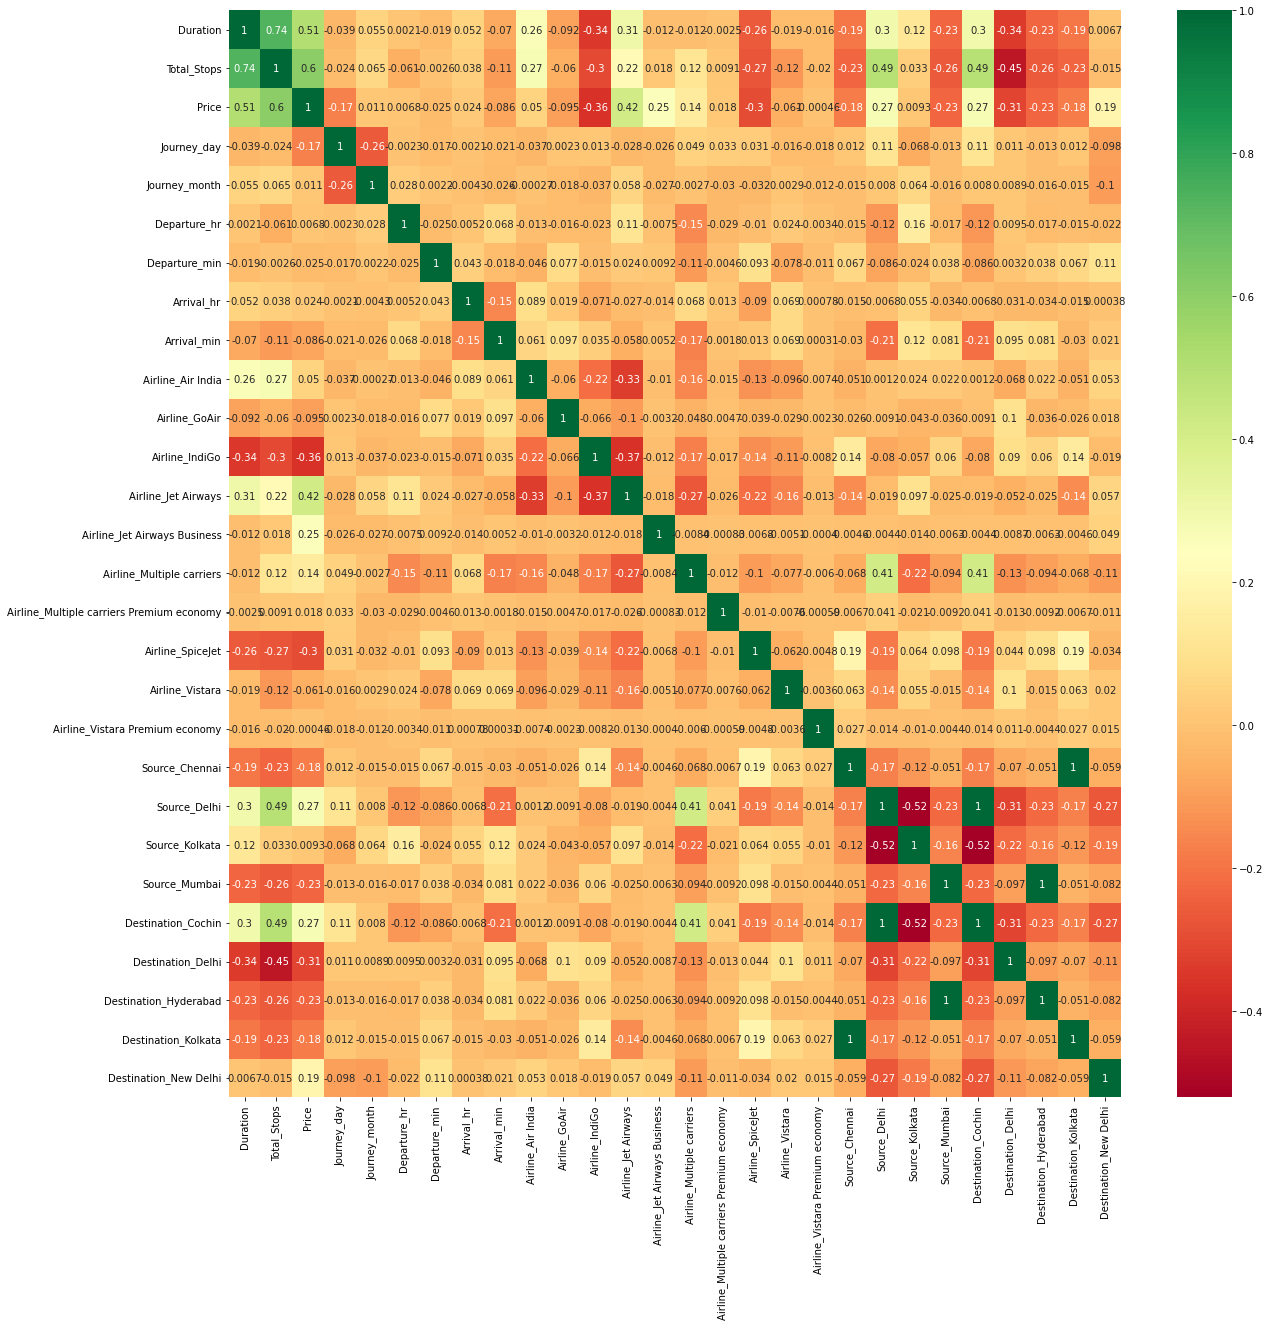

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
print(selection.feature_importances_)

[1.41624419e-01 2.19203489e-01 1.10621882e-01 8.37075461e-02
 2.64885869e-02 2.57889438e-02 3.11016445e-02 2.44998926e-02
 1.00791784e-02 2.18808430e-03 1.64891749e-02 1.34329330e-01
 6.64688459e-02 1.81892732e-02 9.56985857e-04 3.32814698e-03
 5.34468839e-03 1.18100723e-04 5.58929572e-04 9.37973405e-03
 4.49408799e-03 7.14197629e-03 9.49195960e-03 1.76153859e-02
 7.92577318e-03 5.70022470e-04 2.22939186e-02]


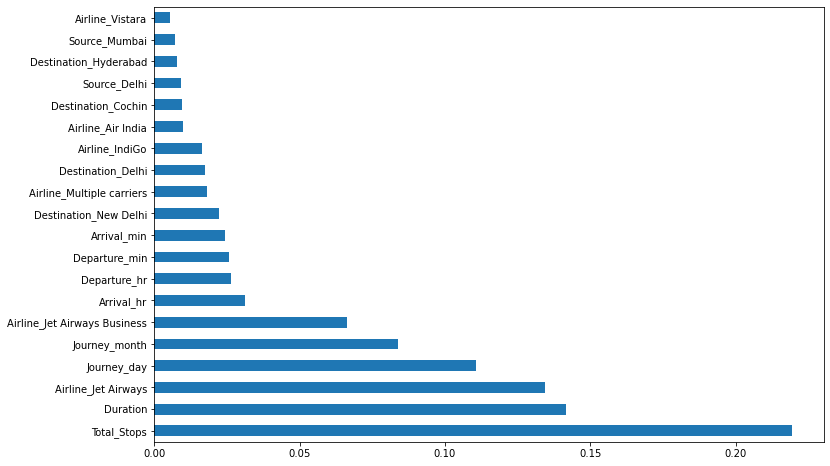

In [37]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
re = RandomForestRegressor()
model = re.fit(X_train, y_train)

In [39]:
model.score(X_test, y_test)

0.806486371174801

In [40]:
model.score(X_train, y_train)

0.9563511924557015

In [41]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,3,10]

rf_grid = {'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth,
          'min_samples_split': min_samples_split,
          'min_samples_leaf': min_samples_leaf}

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=model, param_distributions=rf_grid, n_iter=10,  scoring='neg_mean_squared_error', cv=5, verbose=2, random_state=42)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [ ]:
re = RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20)
re.fit(X_train, y_train)

In [ ]:
re.score(X_train, y_train)

In [ ]:
re.score(X_test, y_test)

In [ ]:
y_pred1 = re.predict(X_test)
y_pred2 = rf_random.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

y_pred = []
for i in y_pred1:
    y_pred.append(int(i))
y_pred1 = np.array(y_pred)

y_pred = []
for i in y_pred2:
    y_pred.append(int(i))
y_pred2 = np.array(y_pred)

In [ ]:
plt.figure(figsize=(17,7))
sns.distplot(y_test-y_pred1)
plt.show()

In [ ]:
plt.figure(figsize=(17,7))
sns.distplot(y_test-y_pred2)
plt.show()

In [ ]:
import pickle

model = open('model.pickle', 'wb')
pickle.dump(rf_random ,model)

In [ ]:
model1 = open('model.pickle', 'rb')
forest = pickle.load(model1)
y_prediction = forest.predict(X_test)

from sklearn import metrics

metrics.r2_score(y_test,y_prediction)